# Predictive Analysis 

In [262]:
# Imoprt libs
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

In [6]:
# Read database 1 
df = pd.read_csv("FP_BA_Netflix - copia (2)/cleaned_merged_data.csv")

In [ ]:
## Regression & Predictive Analysis 

## Data Splitting and Preparation

In [8]:
# Define features and rating as the target variable
Xr = df.drop(columns=['rating'])  
yr = df['rating']

In [22]:
# Identify categorical columns
cat_cols = Xr.select_dtypes(include=['object']).columns

In [28]:
# Preprocessing for numerical data
num_transformer = SimpleImputer(strategy='mean')

In [30]:
# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [32]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, Xr.select_dtypes(exclude=['object']).columns),
        ('cat', cat_transformer, cat_cols)
    ])

In [36]:
# Split the data into training and testing sets
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [178]:
# Convert continuous target variable to discrete classes for Logistic Regression
# Example: Convert ratings to binary classes (0 and 1)
thresholdlog = yr.median()
y_classlog = (yr >= thresholdlog).astype(int)

In [180]:
# Identify categorical columns
logcat_cols = Xr.select_dtypes(include=['object']).columns

In [182]:
# Preprocessing for numerical data
lognum_transformer = SimpleImputer(strategy='mean')

In [184]:
# Preprocessing for categorical data
logcat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [188]:
# Bundle preprocessing for numerical and categorical data
logpreprocessor = ColumnTransformer(
    transformers=[
        ('num', lognum_transformer, Xr.select_dtypes(exclude=['object']).columns),
        ('cat', logcat_transformer, logcat_cols)
    ])

In [194]:
# Split the data into training and testing sets for Logistic Regression
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(Xr, y_classlog, test_size=0.2, random_state=42)

## Model Training

### Random Forest 

In [34]:
# Define the model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [38]:
# Train the random forest model
rf_model.fit(X_trainr, y_trainr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'warnings',
       'language', 'type', 'production_countries'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

### Linear Regression

In [48]:
# Define the model for Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [50]:
# Train the linear regression model
lr_model.fit(X_trainr, y_trainr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'warnings',
       'language', 'type', 'production_countries'],
      dtype='object'))])),
                ('model', LinearRegression())])

### Multiple Linear Regression

In [148]:
# Multiple Linear Regression
mlr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [150]:
# Train the Linear Regression model
mlr_model.fit(X_trainr, y_trainr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'warnings',
       'language', 'type', 'production_countries'],
      dtype='object'))])),
                ('model', LinearRegression())])

### Logistic Regression

In [190]:
# Logistic Regression
logreg_model = Pipeline(steps=[
    ('preprocessor', logpreprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [196]:
# Train the Linear Regression model
logreg_model.fit(X_train_logreg, y_train_logreg)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'warnings',
       'language', 'type', 'production_countries'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

## Models evaluation and predictions

### Random Forest evaluation and predictions

In [224]:
# Make predictions
rf_predictions = rf_model.predict(X_testr)

In [56]:
# Evaluate the model
rf_mse = mean_squared_error(y_testr, rf_predictions)
rf_r2 = r2_score(y_testr, rf_predictions)

In [58]:
# Review results
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R2: {rf_r2}')

Random Forest MSE: 0.7399692378161652
Random Forest R2: 0.37887621818564055


### Lineal Regression evaluation and predictions

In [62]:
# Make predictions
lr_predictions = lr_model.predict(X_testr)

In [64]:
# Evaluate the model
lr_mse = mean_squared_error(y_testr, lr_predictions)
lr_r2 = r2_score(y_testr, lr_predictions)

In [68]:
# Review results
print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression R2: {lr_r2}')

Linear Regression MSE: 0.9872875225867768
Linear Regression R2: 0.17127938780669105


### Multiple Linear Regression evaluation and prediction

In [158]:
# Make predictions
mlr_predictions = mlr_model.predict(X_testr)

In [160]:
# Evaluate the model
mlr_mse = mean_squared_error(y_testr, mlr_predictions)
mlr_r2 = r2_score(y_testr, mlr_predictions)

In [206]:
# Review results
print(f'Multiple Linear Regression MSE: {mlr_mse}')
print(f'Multiple Linear Regression R2: {mlr_r2}')

Multiple Linear Regression MSE: 0.9872875225867768
Multiple Linear Regression R2: 0.17127938780669105


### Logistic Regression evaluation and prediction

In [200]:
# Make predictions for Logistic Regression
logreg_predictions = logreg_model.predict(X_test_logreg)

In [202]:
# Evaluate the model
logreg_mse = mean_squared_error(y_test_logreg, logreg_predictions)
logreg_r2 = r2_score(y_test_logreg, logreg_predictions)

In [208]:
# Review results
print(f'Logistic Regression MSE: {logreg_mse}')
print(f'Logistic Regression R2: {logreg_r2}')

Logistic Regression MSE: 0.2915268456375839
Logistic Regression R2: -0.1690694182594068


## Interpretation and Visualization

### Random Forest visualization

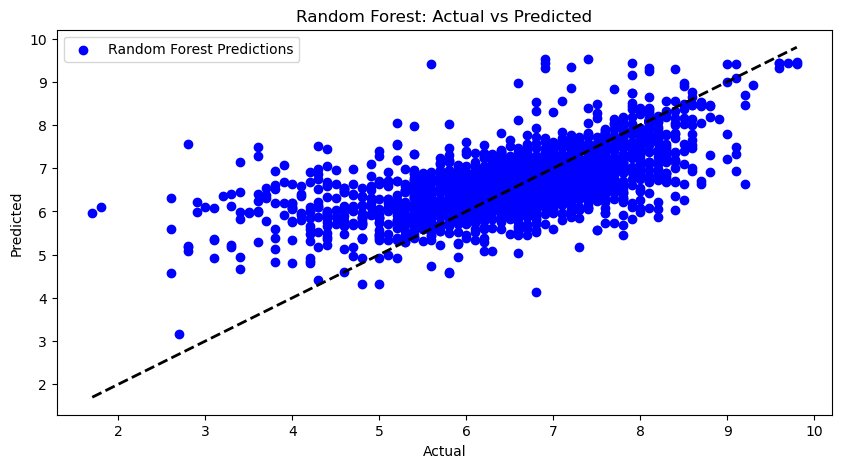

In [226]:
# Plotting Random Forest predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_testr, rf_predictions, color='blue', label='Random Forest Predictions')
plt.plot([y_testr.min(), y_testr.max()], [y_testr.min(), y_testr.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

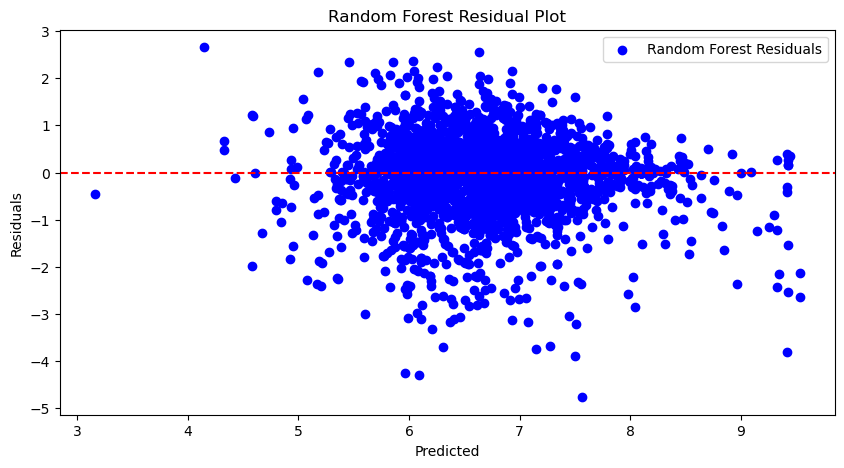

In [230]:
# Residual plot for Linear Regression
rf_residuals = y_testr - rf_predictions
plt.figure(figsize=(10, 5))
plt.scatter(rf_predictions, rf_residuals, color='blue', label='Random Forest Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Random Forest Residual Plot')
plt.legend()
plt.show()

### Lineal Regression visualization

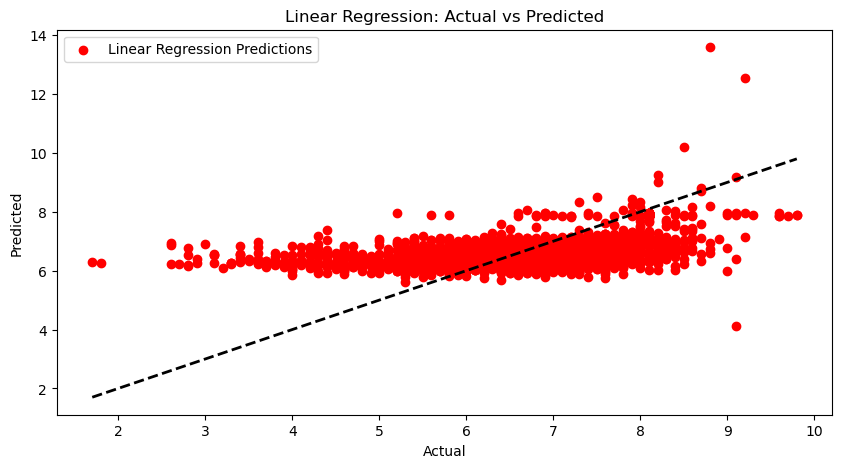

In [78]:
# Plotting Linear Regression predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_testr, lr_predictions, color='red', label='Linear Regression Predictions')
plt.plot([y_testr.min(), y_testr.max()], [y_testr.min(), y_testr.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

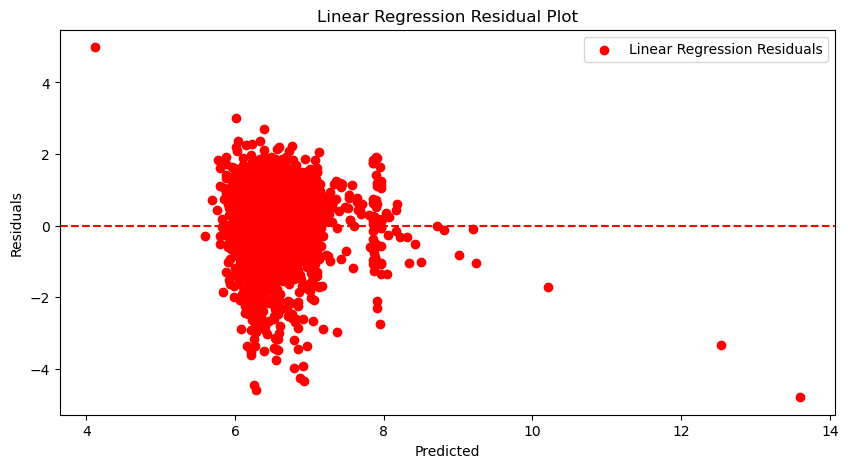

In [234]:
# Residual plot for Linear Regression
lr_residuals = y_testr - lr_predictions
plt.figure(figsize=(10, 5))
plt.scatter(lr_predictions, lr_residuals, color='red', label='Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Linear Regression Residual Plot')
plt.legend()
plt.show()

### Logistic Regression visualization

In [218]:
# Evaluate the Logistic Regression model using confusion matrix and classification report
logreg_cm = confusion_matrix(y_test_logreg, logreg_predictions)
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

Logistic Regression Confusion Matrix:
[[881 251]
 [444 808]]


<Axes: >

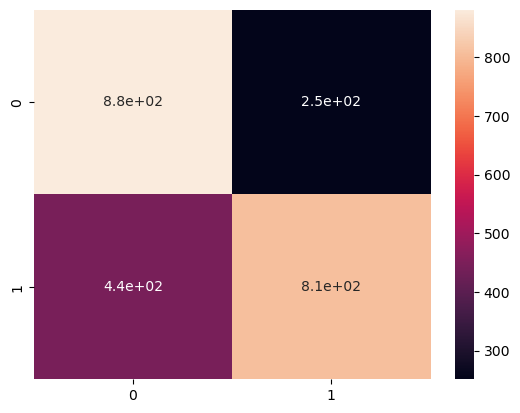

In [216]:
sn.heatmap(logreg_cm, annot=True)

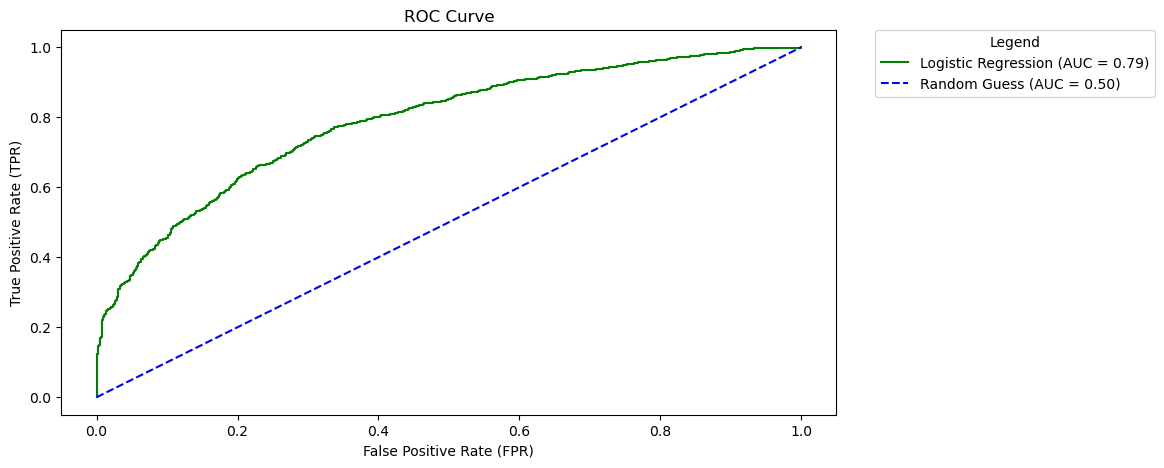

In [258]:
# ROC curve for Logistic Regression
lr_probs = logreg_model.predict_proba(X_test_logreg)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test_logreg, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(10, 5))
plt.plot(lr_fpr, lr_tpr, color='green', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(title='Legend', loc='lower right')
# Move the legend outside the graphic and position it in the upper right
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Classification Modeling & Predictive Analysis

## Data Splitting and Preparation

In [80]:
# Convert continuous target variable to discrete classes
# Example: Convert ratings to binary classes (0 and 1)
threshold = yr.median()
y_classrf = (yr >= threshold).astype(int)

In [94]:
# Define the model
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [264]:
# Define the model pipeline for Decision Tree Classifier
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

In [96]:
# Split the data into training and testing sets
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(Xr, y_classrf, test_size=0.2, random_state=42)

In [266]:
# Split the data into training and testing sets for classification
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(Xr, y_classlog, test_size=0.2, random_state=42)

In [84]:
# Preprocessing for categorical data
non_num_cols = Xr.select_dtypes(include=['object']).columns
Xrf = pd.get_dummies(Xr, columns=non_num_cols, drop_first=True)

## Train Classification Models

### Random Forest

In [102]:
# Train the model
rf_classifier.fit(X_trainrf, y_trainrf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'warnings',
       'language', 'type', 'production_countries'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [222]:
# Make predictions
catrf_predictions = rf_classifier.predict(X_testrf)

In [114]:
# Evaluate the model using confusion matrix and classification report
rf_cm = confusion_matrix(y_testrf, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_cm)

Random Forest Confusion Matrix:
[[881 251]
 [326 926]]


### Decision Tree

In [270]:
# Train the Decision Tree Classifier model
dt_model.fit(X_traindt, y_traindt)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'warnings',
       'language', 'type', 'production_countries'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [274]:
# Make predictions for Decision Tree Classifier
dt_predictions = dt_model.predict(X_testdt)

In [276]:
# Evaluate the Decision Tree Classifier model using confusion matrix and classification report
dt_cm = confusion_matrix(y_testdt, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_cm)

Decision Tree Confusion Matrix:
[[836 296]
 [354 898]]


## Interpretation and Visualization

### Random Forest 

In [118]:
rf_cr = classification_report(y_testrf, rf_predictions)
print("Random Forest Classification Report:")
print(rf_cr)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1132
           1       0.79      0.74      0.76      1252

    accuracy                           0.76      2384
   macro avg       0.76      0.76      0.76      2384
weighted avg       0.76      0.76      0.76      2384



<Axes: xlabel='Predicted', ylabel='Actual'>

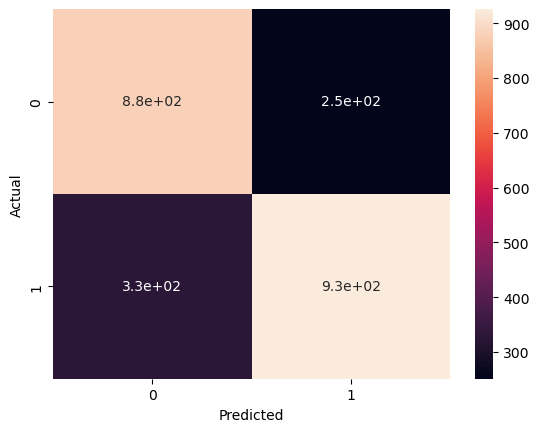

In [214]:
rfcon_matrix = pd.crosstab(y_testrf, rf_predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(rfcon_matrix, annot=True)

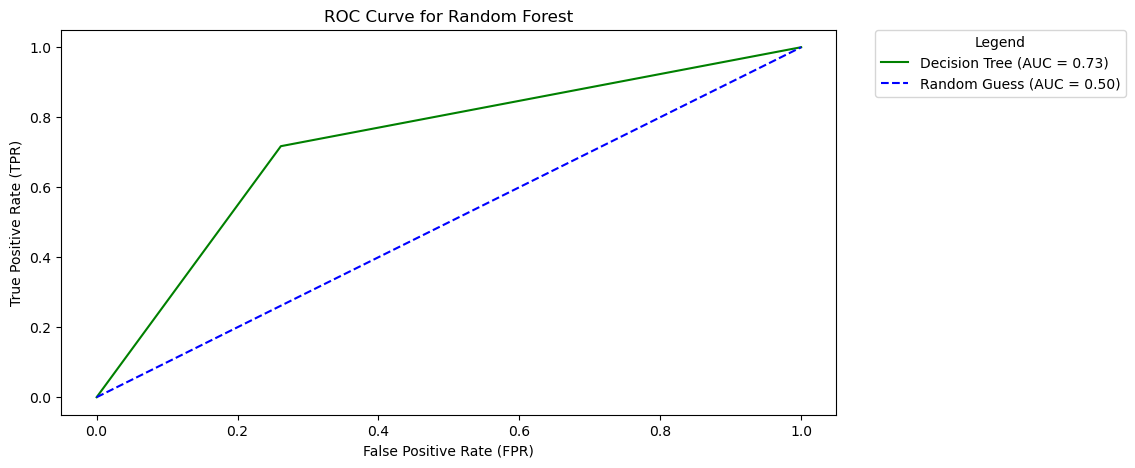

In [288]:
# ROC Curve for Decision Tree Classifier
rfc_probs = rf_classifier.predict_proba(X_testrf)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_testrf, dt_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 5))
plt.plot(rf_fpr, rf_tpr, color='green', label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')

# Move the legend outside the graphic and up right
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

### Decision Tree

In [280]:
dt_cr = classification_report(y_testdt, dt_predictions)
print("Random Forest Classification Report:")
print(dt_cr)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1132
           1       0.75      0.72      0.73      1252

    accuracy                           0.73      2384
   macro avg       0.73      0.73      0.73      2384
weighted avg       0.73      0.73      0.73      2384



<Axes: xlabel='Predicted', ylabel='Actual'>

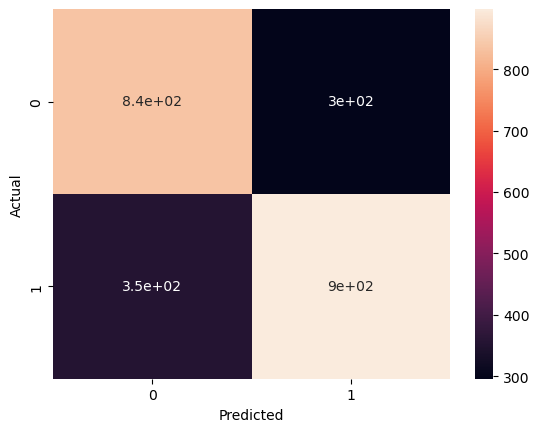

In [282]:
dtcon_matrix = pd.crosstab(y_testdt, dt_predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(dtcon_matrix, annot=True)

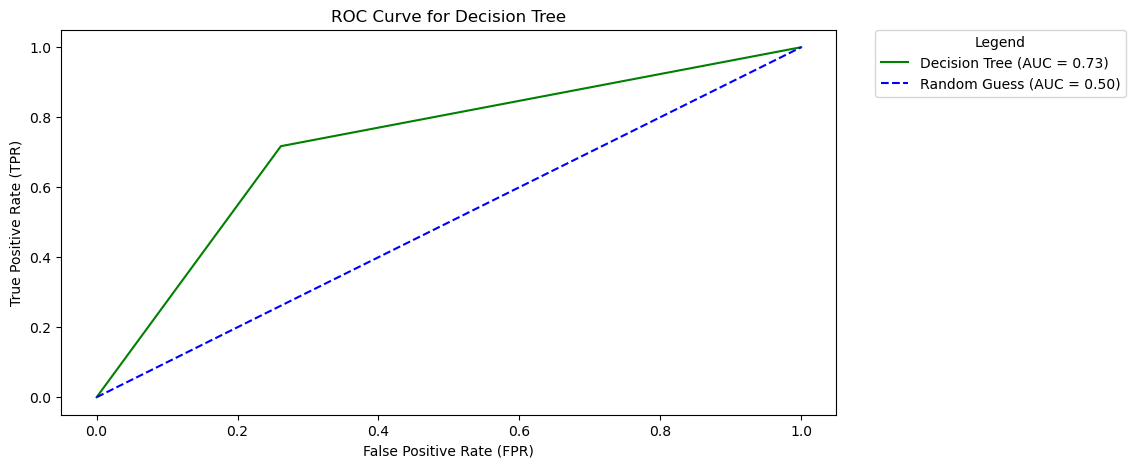

In [286]:
# ROC Curve for Decision Tree Classifier
dt_probs = dt_model.predict_proba(X_testdt)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_testdt, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(10, 5))
plt.plot(dt_fpr, dt_tpr, color='green', label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree')

# Move the legend outside the graphic and up right
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()